Populating the interactive namespace from numpy and matplotlib


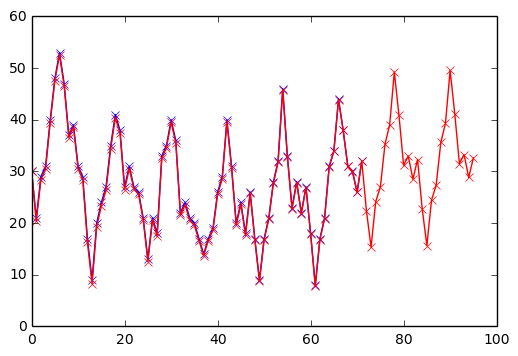

In [4]:
#http://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/
import matplotlib.pyplot as plt
import pandas as pd
import MySQLdb
from statistics import mean
import numpy as np
import time
%pylab inline



series = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]

def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

# >>> initial_trend(series, 12)
# -0.7847222222222222

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

# # forecast 24 points (i.e. two seasons)
# >>> triple_exponential_smoothing(series, 12, 0.716, 0.029, 0.993, 24)
# [30, 20.34449316666667, 28.410051892109554, 30.438122252647577, 39.466817731253066, ...


def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

# >>> initial_seasonal_components(series, 12)
# {0: -7.4305555555555545, 1: -15.097222222222221, 2: -7.263888888888888, 3: -5.097222222222222, 4: 3.402777777777778, 5: 8.069444444444445, 6: 16.569444444444446, 7: 9.736111111111112, 8: -0.7638888888888887, 9: 1.902777777777778, 10: -3.263888888888889, 11: -0.7638888888888887}

#print initial_seasonal_components(series, 12)
#print triple_exponential_smoothing(series, 12, 0.716, 0.029, 0.993, 24)


plt.plot(range(len(series)), series, 'x-')
plt.hold(True)
#triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
pred = triple_exponential_smoothing(series, 12, 0.716, 0.029, 0.993, 24)

plt.plot(range(len(pred)), pred, 'rx-')

plt.show()
